In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline

In [65]:
players = pd.read_csv('Tables/players.csv') # this csv file is taken from web scraped data from Baskeball-Reference
players.head()

,name,active_from,active_to,birth_date,position,trad_position,ppg,trb,ast,height_inches,weight,shooting_hand,hof,college,hs_name,hs_city,hs_state,url
0,Alaa Abdelnaby,1991,1995,1968-06-24,Power Forward,Forward,5.7,3.3,0.3,82.0,240.0,Right,0.0,Duke University,Bloomfield,Bloomfield,New Jersey,/players/a/abdelal01.html
1,Zaid Abdul-Aziz,1969,1978,1946-04-07,Power Forward,Forward,9.0,8.0,1.2,81.0,235.0,Right,0.0,Iowa State University,John Jay,Brooklyn,New York,/players/a/abdulza01.html
2,Kareem Abdul-Jabbar,1970,1989,1947-04-16,Center,Center,24.6,11.2,3.6,86.0,225.0,Right,1.0,"University of California, Los Angeles",Power Memorial,New York,New York,/players/a/abdulka01.html
3,Mahmoud Abdul-Rauf,1991,2001,1969-03-09,Point Guard,Guard,14.6,1.9,3.5,73.0,162.0,Right,0.0,Louisiana State University,Gulfport,Gulfport,Mississippi,/players/a/abdulma02.html
4,Tariq Abdul-Wahad,1998,2003,1974-11-03,Shooting Guard,Guard,7.8,3.3,1.1,78.0,223.0,Right,0.0,"University of Michigan, San Jose State University",Lycee Aristide Briand,Evreux,France,/players/a/abdulta01.html


In [3]:
players_hof = players[players['hof'] == 1]
players_not_hof = players[players['hof'] == 0]

Here are the features from the dataframe:
- name: full name of player, first name and last name
- active_from: year started playing for the NBA
- active_to: last year playing for the NBA (2018 is still active)
- birth_date: datetime variable, date of birth
- position: five positions classification - most common approach in modern ear
- trad_position: three positions classification - traditional approach of describing positions
- ppg: float variable, total points per game
- trb: float variable, total rebounds per game
- ast: float variable, total assists per game
- height_inches: float variable, height measured in inches
- weight: float variable, weight measured in pounds
- shooting hand: prefered shooting hand
- hof: inducted into Naismith Memorial Basketball Hall of Fame as player
- college: college basketball programs of participation
- hs_name: name of high school attended
- hs_city: city of high school location
- hs_state: state or country (if foreign player) of high school
- url: player page in www.basketball-reference.com

## Data visualization

### Individual statistics

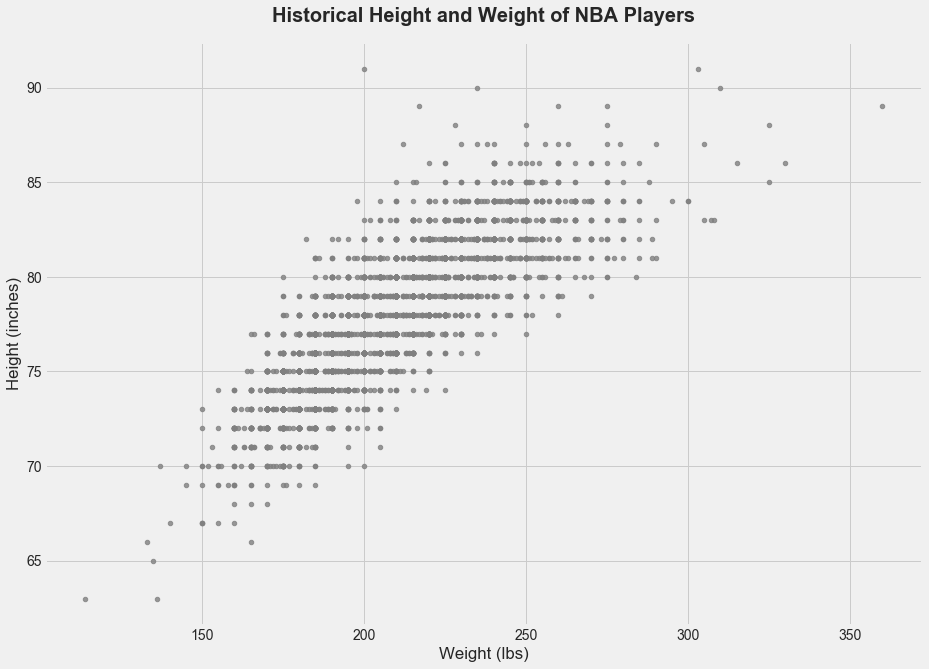

In [11]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

ax = sns.regplot(x='weight', y='height_inches', data=players, 
                 color='grey', fit_reg=False, scatter_kws={"s": 20})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')
plt.title('Historical Height and Weight of NBA Players', fontsize=20, fontweight="bold")

plt.savefig('all-graphs/height_weight.png')

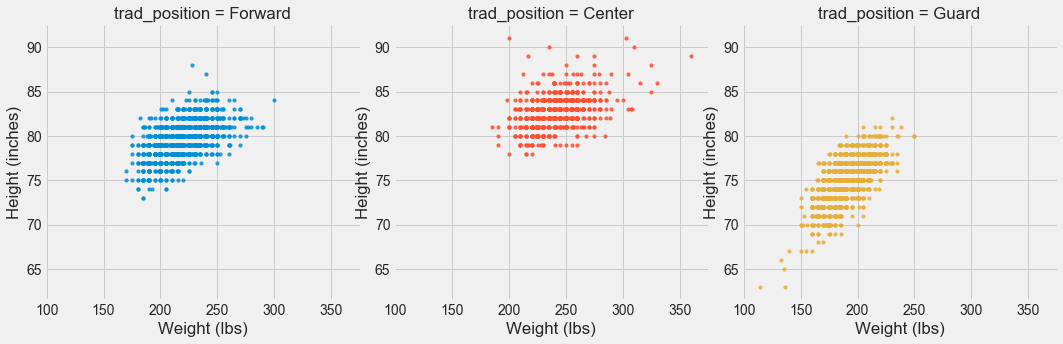

In [145]:
plt.style.use('fivethirtyeight')

ax = sns.lmplot(x="weight", y="height_inches", data=players, 
               col='trad_position', hue='trad_position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 10})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')

plt.savefig('all-graphs/height_weight_3pos.png')

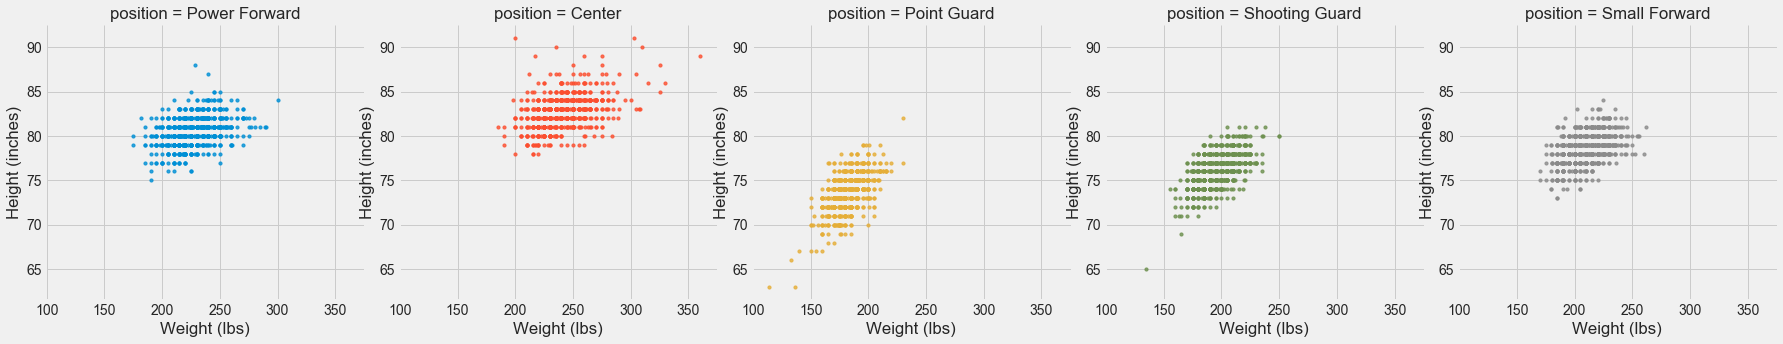

In [146]:
plt.style.use('fivethirtyeight')

ax = sns.lmplot(x="weight", y="height_inches", data=players, 
               col='position', hue='position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 10})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')

plt.savefig('all-graphs/height_weight_5pos.png')

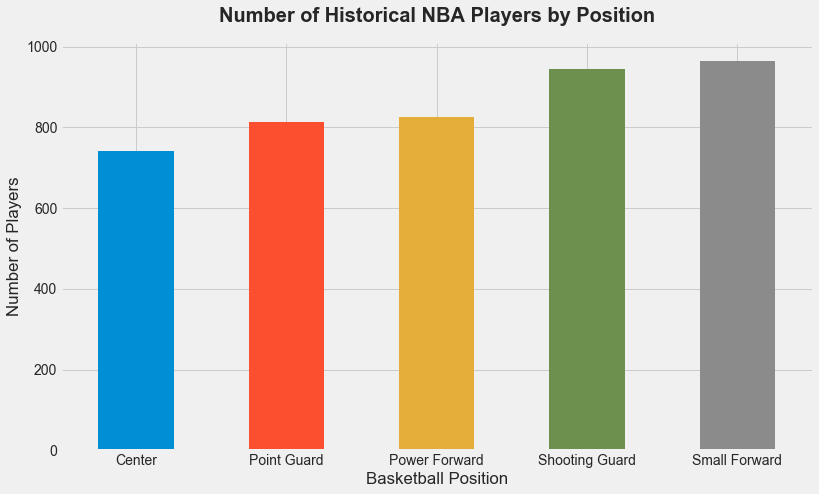

In [94]:
plt.style.use('fivethirtyeight')

ax = players.groupby('position').count()['trad_position'].plot.bar(figsize=(12,7), rot=0)
ax.set(xlabel='Basketball Position', ylabel='Number of Players')

plt.title('Number of Historical NBA Players by Position', fontsize=20, fontweight="bold")

plt.savefig('all-graphs/num_pos.png')

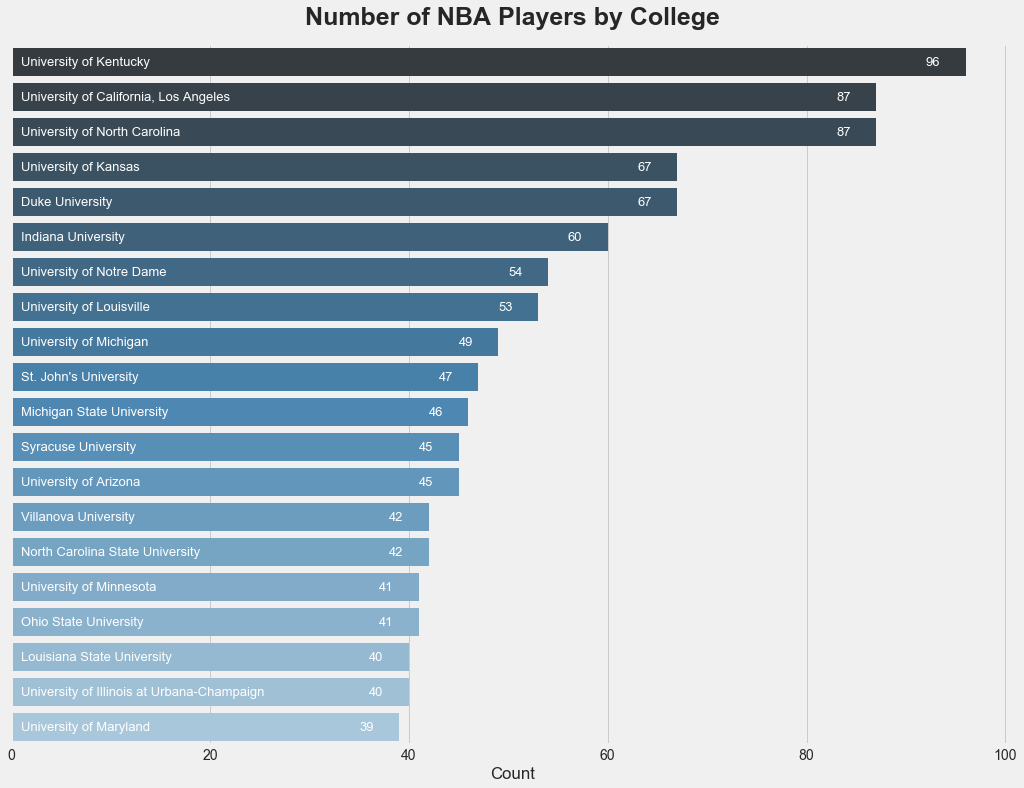

In [91]:
plt.style.use('fivethirtyeight')

top_colleges = players['college'].value_counts()[:20]
top_colleges_df = pd.DataFrame(top_colleges)
top_colleges_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_colleges_df.index, data=top_colleges_df, palette="Blues_d")
plt.title('Number of NBA Players by College', fontsize=25, fontweight='bold')
plt.gca().set_yticks([]);

for num in range(len(top_colleges)):
    plt.text(top_colleges[num]-4, num, top_colleges[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_colleges.index[num], color='white', size=13, verticalalignment='center')
    
plt.savefig('all-graphs/top_colleges.png')

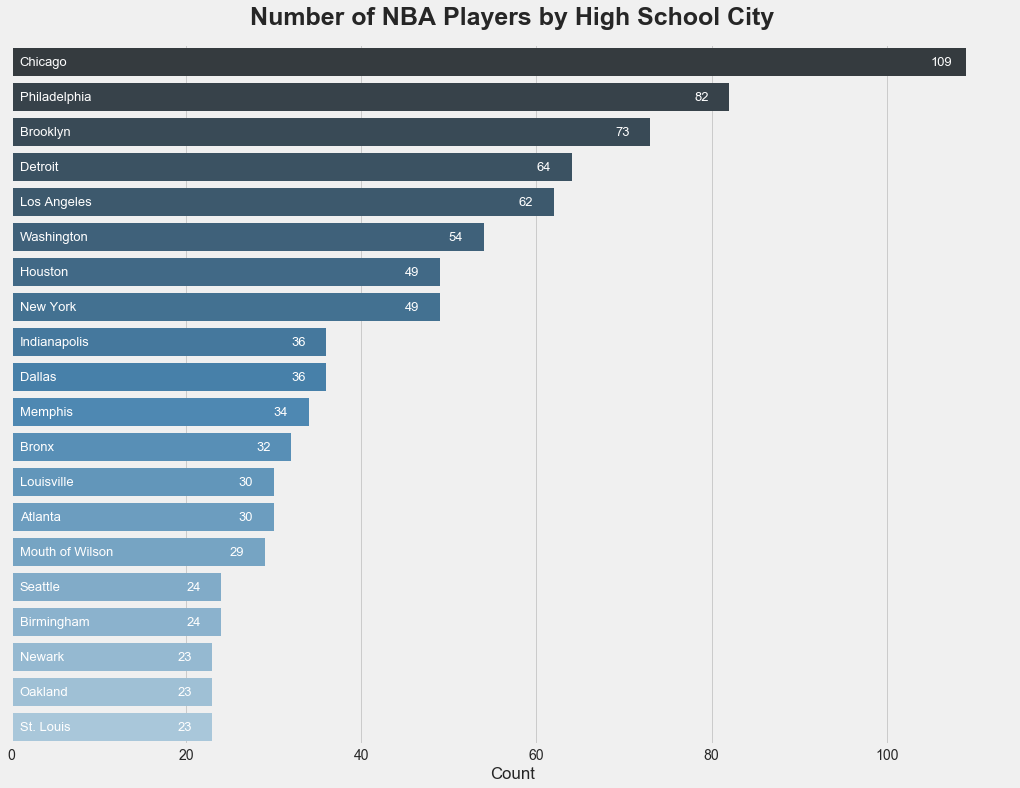

In [92]:
plt.style.use('fivethirtyeight')

top_hs_cities = players['hs_city'].value_counts()[:20]
top_hs_cities_df = pd.DataFrame(top_hs_cities)
top_hs_cities_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_hs_cities_df.index, data=top_hs_cities_df, palette="Blues_d")
plt.title('Number of NBA Players by High School City', fontsize=25, fontweight="bold")
plt.gca().set_yticks([]);

for num in range(len(top_hs_cities)):
    plt.text(top_hs_cities[num]-4, num, top_hs_cities[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_hs_cities.index[num], color='white', size=13, verticalalignment='center')
    
plt.savefig('all-graphs/top_hs_city.png')

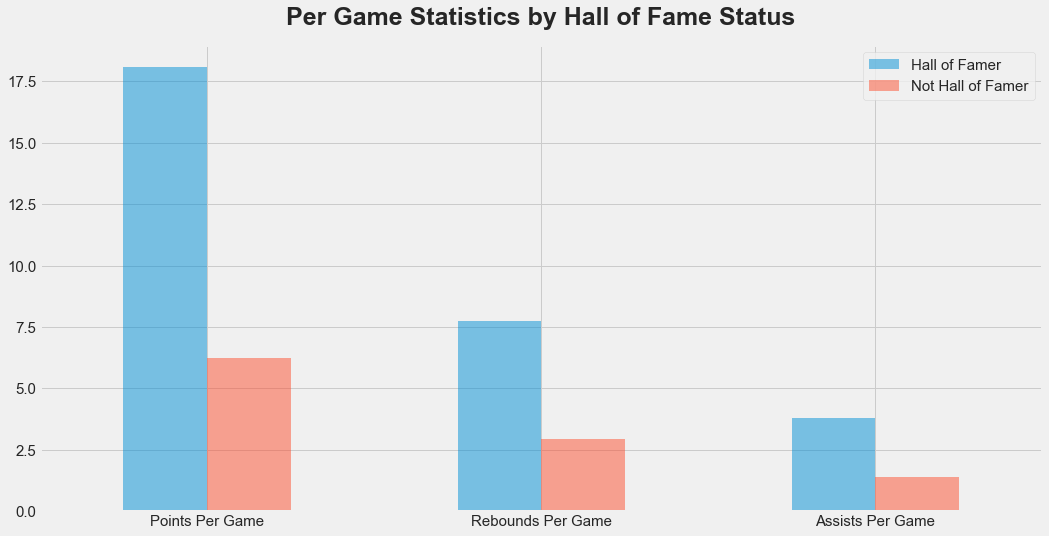

In [49]:
plt.style.use('fivethirtyeight')

sort_by_hof = players.groupby('hof')['ppg', 'trb', 'ast'] # statistics grouped by hof status
sort_by_hof = sort_by_hof.mean().transpose()  # average stats, transposed for graphing purposes
sort_by_hof = sort_by_hof.rename({'ppg': 'Points Per Game', 
                                  'trb': 'Rebounds Per Game', 
                                  'ast': 'Assists Per Game'}, 
                                   axis='index')
sort_by_hof = sort_by_hof.rename({1: 'Hall of Famer', 
                                  0: 'Not Hall of Famer'}, 
                                  axis='columns')
sort_by_hof = sort_by_hof[sort_by_hof.columns[::-1]] # reverse column order
sort_by_hof.plot(kind='bar', figsize=(16,8), alpha=0.5, rot=0)

plt.legend(prop={'size':15}, frameon=True)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.title('Per Game Statistics by Hall of Fame Status', fontsize=25, fontweight="bold")


plt.savefig('all-graphs/hof_stats.png')

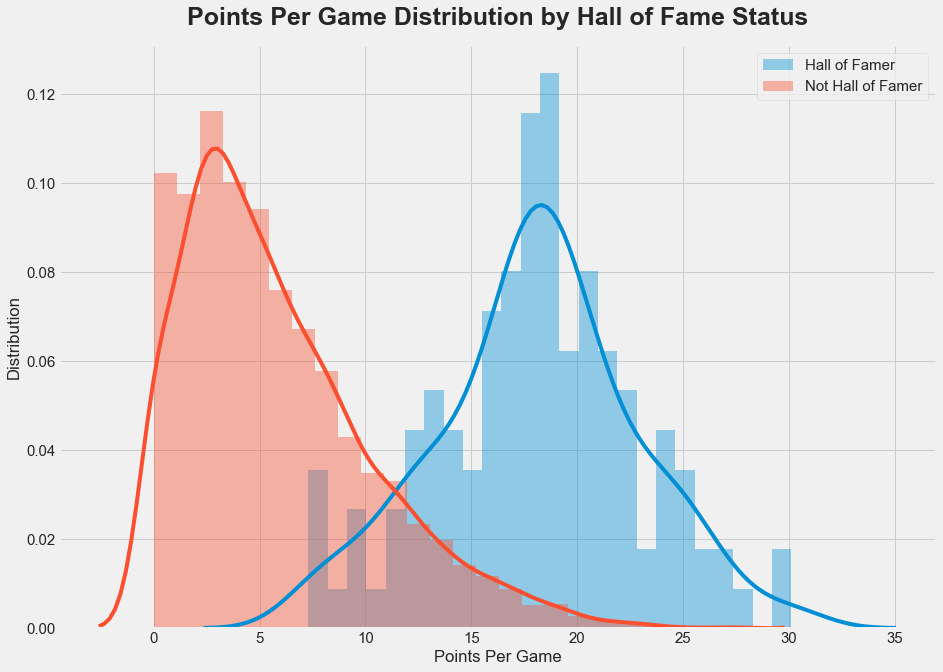

In [62]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))
sns.distplot(players_hof['ppg'], bins=25, label='Hall of Famer')
sns.distplot(players_not_hof['ppg'].fillna(0), bins=25, label='Not Hall of Famer')

plt.legend(loc=1, frameon=True, prop={'size': 15})
plt.xlabel("Points Per Game")
plt.ylabel("Distribution")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Points Per Game Distribution by Hall of Fame Status', fontsize=25, fontweight="bold")

plt.savefig('all-graphs/hof_ppg.png')

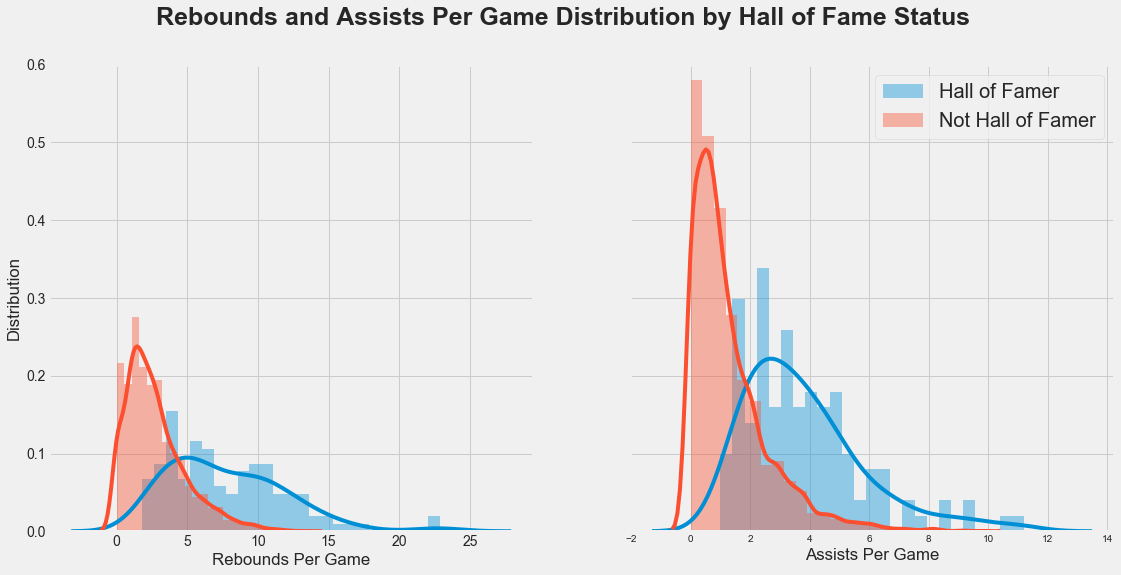

In [61]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(17,8))

sns.distplot(players_hof['trb'], bins=25, label='Hall of Famer', ax=ax1)
sns.distplot(players_not_hof['trb'].fillna(0), bins=25, label='Not Hall of Famer', ax=ax1)
ax1.set(xlabel='Rebounds Per Game', ylabel='Distribution')
plt.xticks(fontsize=27)

sns.distplot(players_hof['ast'], bins=25, label='Hall of Famer', ax=ax2)
sns.distplot(players_not_hof['ast'].fillna(0), bins=25, label='Not Hall of Famer', ax=ax2)
ax2.set(xlabel='Assists Per Game')

plt.legend(loc=1, frameon=True, prop={'size': 20})
plt.ylim(0, 0.6)
plt.xticks(fontsize=10)

from pylab import *
fig = gcf()
fig.suptitle('Rebounds and Assists Per Game Distribution by Hall of Fame Status', fontsize=25, fontweight="bold")

plt.savefig('all-graphs/hof_trb_ast.png')

## Model data for Machine Learning regression

In [20]:
players_feat = players[['position', 'trad_position', 'ppg', 'trb', 'ast', 
                        'height_inches', 'weight', 'hof']].copy()

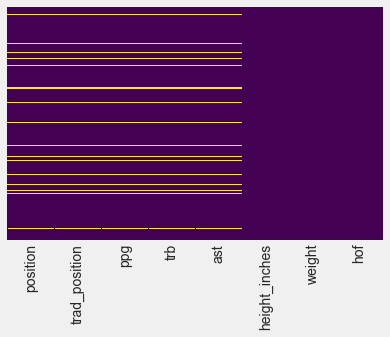

In [21]:
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

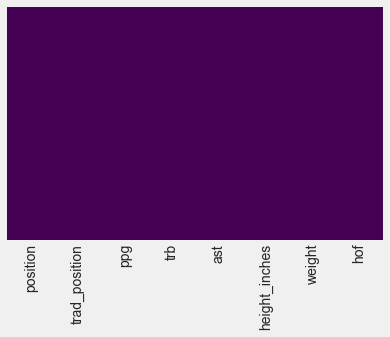

In [22]:
players_feat = players_feat.dropna() # delete rows with NaN values
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Model data for Machine Learning regression

### Modern Five Positions

In [34]:
from sklearn.model_selection import train_test_split

X = players_feat[['ppg', 'trb', 'ast', 'height_inches', 'weight']]
y = players_feat['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression Model</font>

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))   


                precision    recall  f1-score   support

        Center       0.62      0.66      0.64       241
   Point Guard       0.67      0.71      0.69       235
 Power Forward       0.39      0.23      0.29       236
Shooting Guard       0.51      0.54      0.53       283
 Small Forward       0.48      0.55      0.52       291

   avg / total       0.53      0.54      0.53      1286



[[159   0  49   5  28]
 [  0 166   0  61   8]
 [ 85   0  55  12  84]
 [  0  74   2 154  53]
 [ 14   9  36  71 161]]


accuracy Score:  0.5404354587869362


<font color='blue'>Decision Tree Classifier</font>

In [118]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))   

                precision    recall  f1-score   support

        Center       0.73      0.65      0.69       241
   Point Guard       0.68      0.66      0.67       235
 Power Forward       0.45      0.48      0.46       236
Shooting Guard       0.54      0.57      0.55       283
 Small Forward       0.54      0.55      0.54       291

   avg / total       0.58      0.58      0.58      1286



[[157   0  69   1  14]
 [  0 154   2  71   8]
 [ 48   1 113   9  65]
 [  1  62  10 160  50]
 [  9  10  58  54 160]]


accuracy Score:  0.578538102643857


<font color='blue'>Naive Bayse Classifier</font>

In [119]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))  

                precision    recall  f1-score   support

        Center       0.79      0.68      0.73       241
   Point Guard       0.70      0.70      0.70       235
 Power Forward       0.51      0.57      0.54       236
Shooting Guard       0.58      0.56      0.57       283
 Small Forward       0.62      0.66      0.64       291

   avg / total       0.64      0.63      0.63      1286



[[164   0  70   0   7]
 [  0 164   0  69   2]
 [ 42   0 135   4  55]
 [  0  68   2 159  54]
 [  2   1  57  40 191]]


accuracy Score:  0.6321928460342147


<font color='blue'>Support Vector Machine Classifier</font>

In [120]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))  

                precision    recall  f1-score   support

        Center       0.79      0.61      0.69       241
   Point Guard       0.71      0.66      0.68       235
 Power Forward       0.51      0.56      0.53       236
Shooting Guard       0.57      0.59      0.58       283
 Small Forward       0.57      0.64      0.60       291

   avg / total       0.62      0.61      0.62      1286



[[147   0  76   0  18]
 [  0 154   0  73   8]
 [ 37   1 133   5  60]
 [  0  58   1 167  57]
 [  3   4  52  46 186]]


accuracy Score:  0.6119751166407466


### Traditional Three Positions

In [121]:
X = players_feat[['ppg', 'trb', 'ast', 'height_inches', 'weight']]
y = players_feat['trad_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression Model</font>

In [122]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.67      0.33      0.44       226
    Forward       0.67      0.80      0.73       528
      Guard       0.87      0.89      0.88       532

avg / total       0.75      0.75      0.74      1286



[[ 74 147   5]
 [ 37 425  66]
 [  0  61 471]]


<font color='blue'>Decision Tree Classifier</font>

In [123]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.67      0.66      0.67       226
    Forward       0.70      0.72      0.71       528
      Guard       0.86      0.84      0.85       532

avg / total       0.76      0.76      0.76      1286



[[150  75   1]
 [ 74 380  74]
 [  0  85 447]]


<font color='blue'>Naive Bayse Classifier</font>

In [124]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

     Center       0.73      0.74      0.73       226
    Forward       0.76      0.78      0.77       528
      Guard       0.89      0.86      0.88       532

avg / total       0.81      0.81      0.81      1286



[[167  59   0]
 [ 63 411  54]
 [  0  72 460]]


<font color='blue'>Support Vector Machine Classifier</font>

In [125]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))  

             precision    recall  f1-score   support

     Center       0.74      0.48      0.58       226
    Forward       0.68      0.83      0.74       528
      Guard       0.89      0.83      0.86       532

avg / total       0.78      0.77      0.76      1286



[[108 118   0]
 [ 38 436  54]
 [  0  90 442]]


accuracy Score:  0.7667185069984448


### Predicting hall of fame status
#### By points per game, total rebounds per game, and assists per game

In [142]:
print("Correlation between PPG and HOF: {}".format(players_feat['ppg'].corr(players_feat['hof'])))
print("Correlation between TRB and HOF: {}".format(players_feat['trb'].corr(players_feat['hof'])))
print("Correlation between AST and HOF: {}".format(players_feat['ast'].corr(players_feat['hof'])))

Correlation between PPG and HOF: 0.41269034234184315
Correlation between TRB and HOF: 0.34648426716610276
Correlation between AST and HOF: 0.2912268316553373


In [126]:
X = players_feat[['ppg', 'trb', 'ast']]
y = players_feat['hof']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression</font>

In [127]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1250
        1.0       0.56      0.25      0.35        36

avg / total       0.97      0.97      0.97      1286



[[1243    7]
 [  27    9]]


Is John Wall a Hall of Famer?

In [128]:
JW = players[players['name'] == 'John Wall'][['ppg', 'trb', 'ast']]
predictions = logmodel.predict(JW)
predictions

array([1.])

In [129]:
lb = players[players['name'] == 'LeBron James'][['ppg', 'trb', 'ast']]
players[['ppg', 'trb', 'ast']].dropna().head(10)

,ppg,trb,ast
0,5.7,3.3,0.3
1,9.0,8.0,1.2
2,24.6,11.2,3.6
3,14.6,1.9,3.5
4,7.8,3.3,1.1
5,18.1,7.5,2.5
6,5.6,3.2,1.2
7,0.0,1.0,1.0
9,5.3,1.4,0.5
10,2.7,1.0,0.5


### Year-by-year statistics

In [24]:
left_hand = []
right_hand = []
height = []
weight = []
ppg = []
trb = []
ast = []


start = players.active_from.min() # 1947 Season
end = players.active_from.max() # 2018 Season

for year in range(start,end):
    active = (players.active_from.values <= year) & (players.active_to >= year) # only include active players
    height.append(np.mean(players[active].height_inches)) # average height in inches
    weight.append(np.mean(players[active].weight)) # average weight in pounds
    left_hand.append(1.0*np.sum(players[active].shooting_hand == 'Left')) # number of left handed shooters
    right_hand.append(1.0*np.sum(players[active].shooting_hand == 'Right')) # number of right handed shooters
    ppg.append(np.mean(players[active].ppg))
    trb.append(np.mean(players[active].trb))
    ast.append(np.mean(players[active].ast))
    
# create a DataFrame with a summary
stats_year = pd.DataFrame({'season': np.arange(start,end), 
                          'height': height,
                          'weight': weight,
                          'left_hand': left_hand,
                          'right_hand': right_hand,
                          'ppg': ppg,
                          'trb': trb,
                          'ast': ast}).set_index('season')

# preview
stats_year.head()

,ast,height,left_hand,ppg,right_hand,trb,weight
season,,,,,,,
1947,1.721739,74.322981,1.0,9.339130,22.0,3.791304,188.656250
1948,1.925000,74.570175,1.0,8.993750,31.0,3.671875,187.362832
1949,1.944444,75.197740,3.0,8.674603,60.0,3.974603,191.536723
1950,2.021138,75.324444,5.0,8.518699,118.0,4.040650,191.493274
1951,1.930065,75.843137,6.0,8.183660,147.0,3.984314,194.549020


The per-season figures reflect the average statistical value for players who were active that year. It assumes that every player had a consistent height and weight for their entire careers, which is unlikely since players tend to be shortest/lightest their rookie years. It also assumes that players did not switch their shooting hands during their careers.

We can get more detailed season averages on [this page](http://en.wikipedia.org "Basketball Reference"), but for the purpose of this exercise we will use career averages for players active in each season

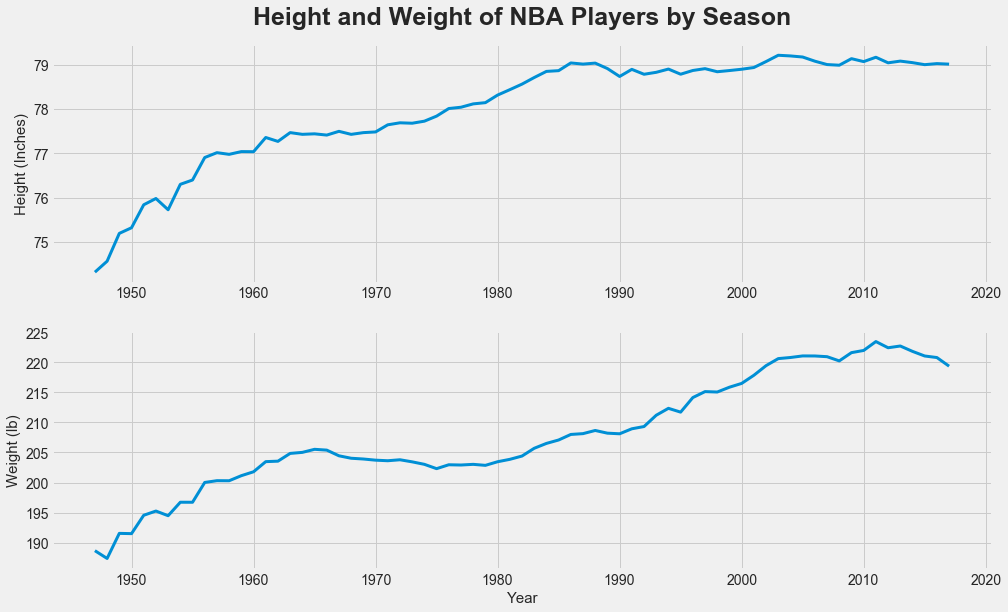

In [81]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,9))

plt.subplot(2, 1, 1)
plt.title('Height and Weight of NBA Players by Season', fontsize = 25, fontweight='bold')
plt.plot(stats_year['height'], linewidth=3.0)
plt.ylabel("Height (Inches)", fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(stats_year['weight'], linewidth=3.0)
plt.ylabel('Weight (lb)', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.savefig('all-graphs/yoy_weight_weight.png')

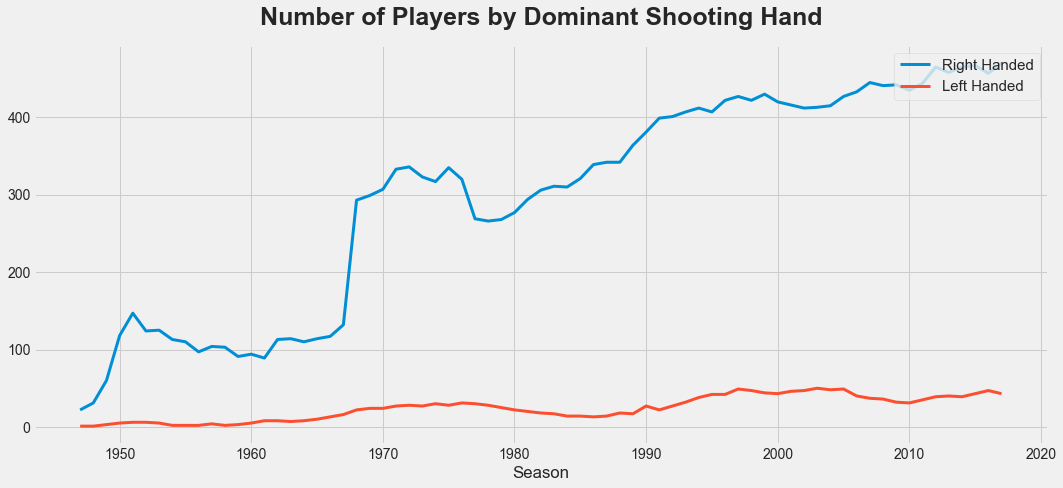

In [118]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,7))

stats_year['right_hand'].plot(figsize=(15,7), label='Right Handed', linewidth=3.0)
stats_year['left_hand'].plot(label='Left Handed', linewidth=3.0)

plt.legend(loc=1, frameon=True, prop={'size': 15})
plt.xlabel("Season")
plt.title('Number of Players by Dominant Shooting Hand', fontsize = 25, fontweight='bold')

plt.tight_layout()

plt.savefig('all-graphs/yoy_ppg_trb_ast.png')

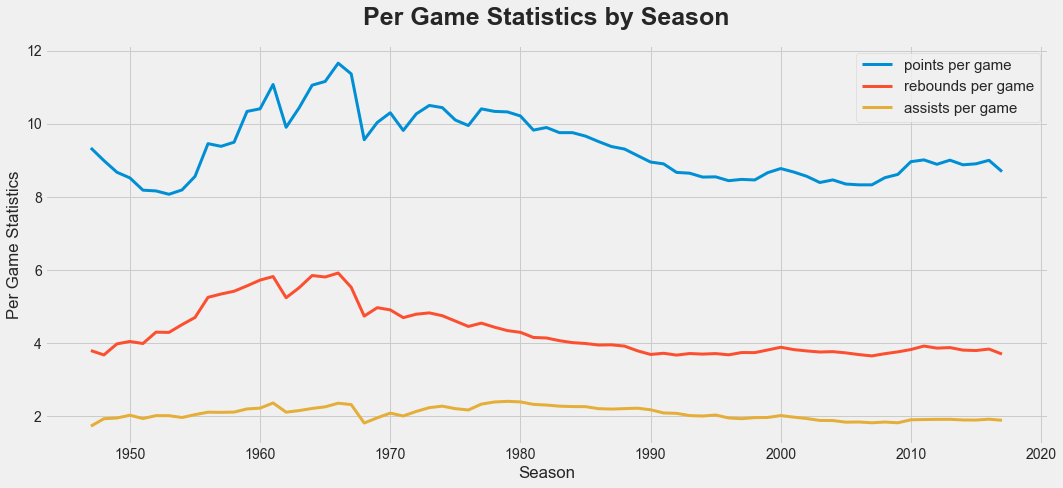

In [67]:
plt.style.use('fivethirtyeight')

stats_year['ppg'].plot(figsize=(15,7), label='points per game', linewidth=3.0)
stats_year['trb'].plot(label='rebounds per game', linewidth=3.0)
stats_year['ast'].plot(label='assists per game', linewidth=3.0)

plt.legend(loc=1, frameon=True, prop={'size': 15})
plt.xlabel("Season")
plt.ylabel("Per Game Statistics")
plt.title('Per Game Statistics by Season', fontsize = 25, fontweight='bold')

plt.tight_layout()

plt.savefig('all-graphs/yoy_ppg_trb_ast.png')

### Predicting Height by year

In [35]:
X = stats_year.drop('height', axis=1)
y = stats_year['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Linear Regression Model</font>

In [36]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print("R2 Score: ", lm.score(X_test, y_test))

R2 Score:  0.9494728679827705


In [37]:
predictions

array([76.79614567, 78.68275401, 78.64648108, 77.44347041, 77.50552394,
       76.77429189, 78.72186362, 77.92952997, 79.26103417, 78.68943039,
       77.27769212, 75.35364831, 76.23736803, 77.4472847 , 76.24887291,
       79.38612976, 78.74996939, 77.79807113, 79.04932305, 77.55297557,
       78.41888196, 79.20419934])

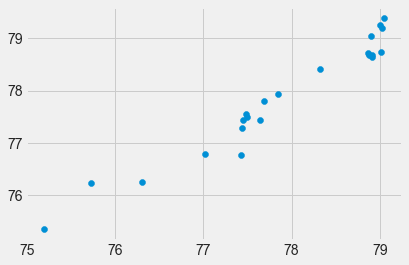

In [43]:
plt.scatter(y_test, predictions) ## y_test contains the contain ppg averages year-by-year

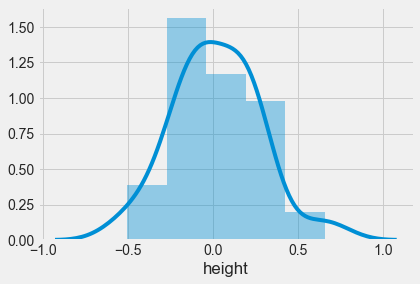

In [39]:
sns.distplot(y_test - predictions) # histogram of the residuals